<a href="https://colab.research.google.com/github/jeshmin-shrestha/Image-Stitching-/blob/main/Image_stitching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Image Stiching

In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display

Listing images files

In [ ]:

image_files = ["left.jpg", "right.jpg"]
resize_to = (1024, 768) # i can change this hai kati bhannu [parcha tei resolution dinne]

Showing the two images

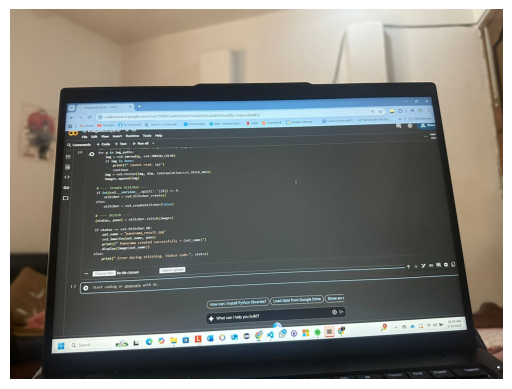

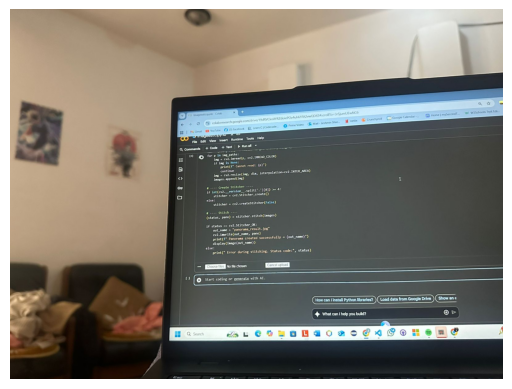

In [ ]:
import matplotlib.pyplot as plt

for file in image_files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


#### Read and resize images

imread_color = reads images files in BGR (Blue Green Red) format.

if it cant read it simply prints error message.

 resizes the images into a list called images.

In [ ]:
#  Read and resize images
images = []
for path in image_files:
    img = cv2.imread(path, cv2.IMREAD_COLOR) # BGR format ma
    if img is None:
        print(f" Could not read image: {path}")
        continue
    if resize_to:
        img = cv2.resize(img, resize_to, interpolation=cv2.INTER_AREA)
    images.append(img)
# images =[array_for_left,array_for_right] pixel colors ma huncha

Sticher object Creation

this is the main hero in merging the images

In [ ]:
# Create the Stitcher
if int(cv2.__version__.split('.')[0]) >= 4:
    stitcher = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
else:
    stitcher = cv2.createStitcher(False)

# Stitch the images
(status, pano) = stitcher.stitch(images)


what the sticher actually do?

* Finds the matching point between the images like the edges and corners
* Figures how much to rotate or shift 1st image to align with the 2nd
* Blends them into one big smoothly transitioned panorama

#### Parameters:
status is the number showing if it worked or not
pano is the final image as a NumPy Array

 Panorama created successfully 


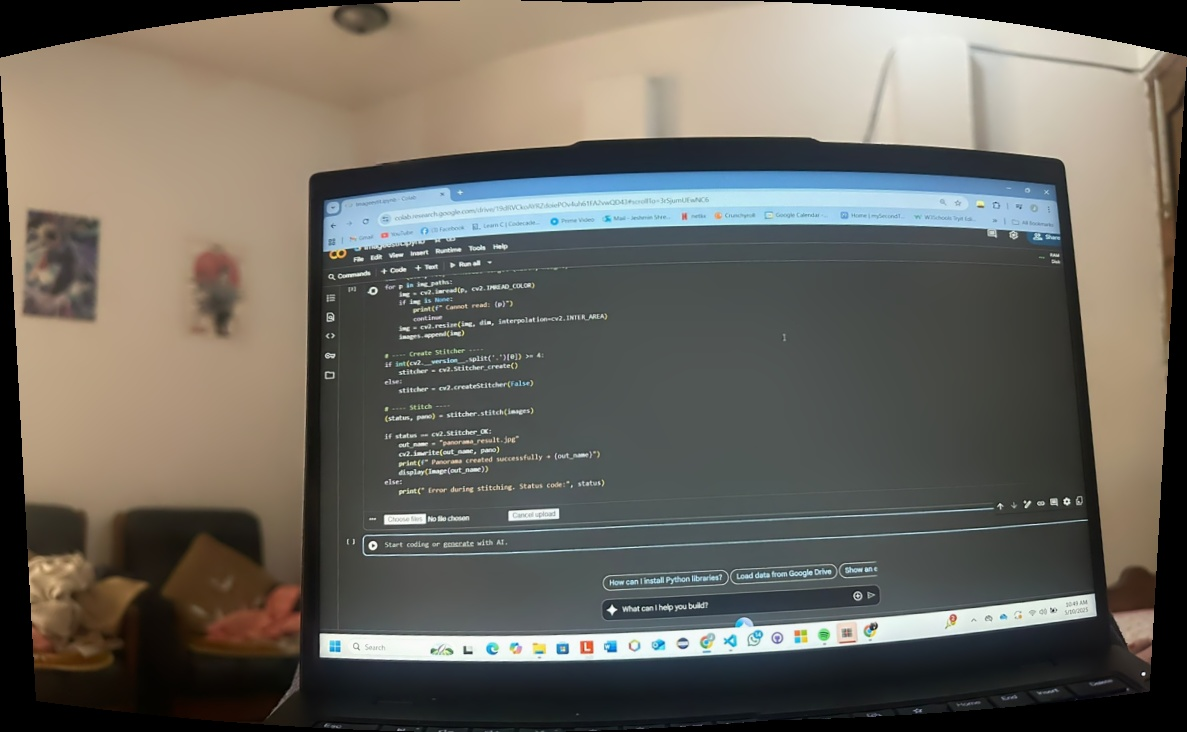

In [ ]:
# Check result
if status == cv2.Stitcher_OK:
    cv2.imwrite("panorama_result.jpg", pano)
    print(" Panorama created successfully ")
    display(Image("panorama_result.jpg"))
else:
    print(f" Stitching failed. Status code: {status}")
    if status == 1:
        print(" Need more overlapping images.")
    elif status == 2:
        print(" Homography estimation failed (try different order or more texture).")
    elif status == 3:
        print(" Camera parameter adjustment failed.")
